In [19]:
import numpy as np
import pandas as pd
from matplotlib import  pyplot as plt 

data = pd.read_csv("/mnt/AA0066EF0066C1C5/Internship/Digit_recognization/digit-recognizer/train.csv")
test_data = pd.read_csv("/mnt/AA0066EF0066C1C5/Internship/Digit_recognization/digit-recognizer/test.csv")  


# data.head()

In [4]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)

data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev=X_dev / 255

data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape


# X_train[:,0].shape

In [ ]:
Y_train

In [6]:

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
   A = np.exp(Z) / sum(np.exp(Z))
   return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            accuracy=get_accuracy(predictions, Y)
            print(accuracy)
    return W1, b1, W2, b2


In [7]:
W1, b1, W2, b2 =gradient_descent(X_train,Y_train,800,0.1)

Iteration:  0
[3 3 3 ... 0 4 3] [1 2 4 ... 9 7 6]
0.07212195121951219
Iteration:  10
[0 4 0 ... 4 4 3] [1 2 4 ... 9 7 6]
0.15985365853658537
Iteration:  20
[0 4 0 ... 4 4 4] [1 2 4 ... 9 7 6]
0.2054390243902439
Iteration:  30
[3 4 0 ... 4 4 4] [1 2 4 ... 9 7 6]
0.2313658536585366
Iteration:  40
[3 4 0 ... 4 4 4] [1 2 4 ... 9 7 6]
0.24378048780487804
Iteration:  50
[2 4 4 ... 4 2 4] [1 2 4 ... 9 7 6]
0.26
Iteration:  60
[2 0 0 ... 4 2 4] [1 2 4 ... 9 7 6]
0.27631707317073173
Iteration:  70
[1 0 0 ... 4 1 4] [1 2 4 ... 9 7 6]
0.33402439024390246
Iteration:  80
[1 3 0 ... 4 1 4] [1 2 4 ... 9 7 6]
0.35434146341463413
Iteration:  90
[1 6 0 ... 4 1 4] [1 2 4 ... 9 7 6]
0.37473170731707317
Iteration:  100
[1 6 0 ... 4 1 4] [1 2 4 ... 9 7 6]
0.3996829268292683
Iteration:  110
[1 6 4 ... 4 1 6] [1 2 4 ... 9 7 6]
0.43634146341463415
Iteration:  120
[1 6 4 ... 4 1 6] [1 2 4 ... 9 7 6]
0.4776829268292683
Iteration:  130
[1 6 4 ... 4 1 6] [1 2 4 ... 9 7 6]
0.5132926829268293
Iteration:  140
[1 6 4 

In [37]:
import numpy as np
import io
import tkinter as tk
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

def make_prediction(X,W1,b1,W2,b2):
    _,_,_, A2=forward_prop(W1,b1,W2,b2,X)
    prediction=get_predictions(A2)
    return prediction


def test_prediction(index,W1,b1,W2,b2):
    current_image=X_train[:,index,None]
    prediction=make_prediction(X_train[:,index,None], W1,b1,W2,b2)
    label=Y_train[index]
    print("predction:",prediction)
    print("label:",label)
    print(f"accuracy is {accuracy * 100} %")
    current_image=current_image.reshape(28,28)*255
    plt.gray()
    plt.imshow(current_image,interpolation='nearest')
    plt.show()

predction: [9]
label: 9
[7 0 0 1 6 3 9 0 2 2 4 4 3 2 6 6 4 4 0 8 8 7 2 6 3 8 5 1 1 7 2 4 6 4 7 9 6
 6 6 3 1 0 4 4 6 4 1 3 5 5 0 5 9 5 1 8 9 3 4 2 9 4 3 9 0 6 7 6 1 3 4 1 4 7
 0 9 2 3 8 9 3 8 2 4 2 9 8 1 0 2 8 4 1 7 4 7 6 9 4 8 3 2 6 4 1 7 9 0 1 4 2
 0 1 1 7 1 7 4 3 5 5 1 1 9 0 5 3 4 7 7 5 9 5 4 3 2 2 7 9 4 6 7 3 8 8 2 7 5
 4 9 6 0 7 2 4 9 6 0 3 4 0 3 1 1 1 4 8 2 5 2 5 4 8 9 6 3 3 8 7 8 1 3 1 8 3
 0 2 4 8 3 8 8 2 7 2 5 4 8 0 8 7 7 6 7 8 5 5 6 9 4 6 3 6 5 8 9 5 9 0 9 7 2
 2 9 2 0 1 6 6 8 1 5 4 1 5 3 0 0 0 3 4 9 2 1 4 1 3 0 6 9 1 3 7 7 0 2 9 0 4
 1 1 7 0 9 9 4 8 4 9 1 8 3 0 1 5 4 8 9 1 9 5 4 2 9 6 7 2 3 4 4 3 4 2 6 2 1
 1 9 9 7 9 9 9 1 2 6 5 2 9 7 9 3 9 3 4 8 6 5 6 6 0 8 6 4 0 4 3 9 9 1 2 3 7
 7 6 8 0 9 5 9 2 2 4 5 8 7 6 8 6 9 8 8 6 1 0 3 4 7 6 1 8 0 2 2 2 3 7 3 0 2
 7 4 2 4 2 5 4 3 4 2 3 7 7 1 0 4 8 4 4 0 5 4 6 3 4 8 1 3 8 8 5 0 2 9 7 9 8
 1 9 8 5 9 0 3 7 5 7 6 0 8 3 2 5 8 5 6 5 2 5 3 6 5 8 3 7 7 1 1 4 2 2 1 3 2
 1 2 2 8 3 8 2 0 3 9 5 1 6 8 5 3 7 8 9 0 4 4 2 1 3 9 4 6 4 2 1 3 0 4 1 1 7
 

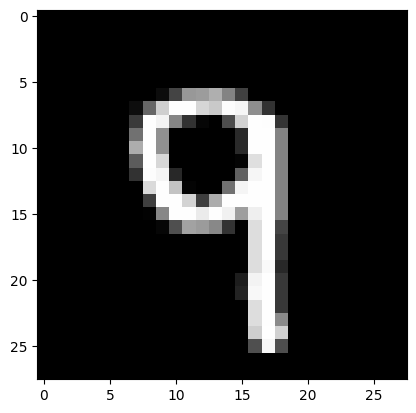

In [36]:
test_prediction(1695,W1,b1,W2,b2)


